In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Q1:　the figure with the y-axis scale from 0 to 4

In [3]:
df1 = pd.read_csv("20201009_nakato_sampledata/E024-Input.jaccard.csv", sep='\t', skiprows=6, index_col='Strand shift')
df2 = pd.read_csv("20201009_nakato_sampledata/E058-Input.jaccard.csv", sep='\t', skiprows=6, index_col='Strand shift')
df3 = pd.read_csv("20201009_nakato_sampledata/E096-Input.jaccard.csv", sep='\t', skiprows=6, index_col='Strand shift')

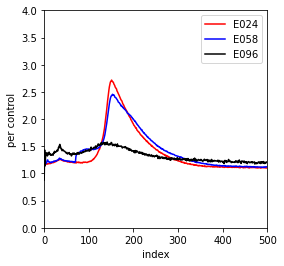

In [9]:
# 図をpdfにして保存
plt.figure(figsize=(4,4))
plt.plot(df1.iloc[:,3], label="E024", color="red")
plt.plot(df2.iloc[:,3], label="E058", color="blue")
plt.plot(df3.iloc[:,3], label="E096", color="black")
plt.xlim(0,500)
plt.ylim(0,4)
plt.xlabel("index")
plt.ylabel("per control")
plt.legend(loc='upper right')
plt.savefig("rinkou1.pdf")

Q2: the figure with the x-axis as the logarithmic axis from 0 to 1000000.

/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  


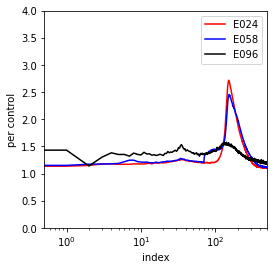

In [17]:
# 図をpdfにして保存
plt.figure(figsize=(4,4))
plt.semilogx(df1.iloc[:,3], label="E024", color="red")
plt.semilogx(df2.iloc[:,3], label="E058", color="blue")
plt.semilogx(df3.iloc[:,3], label="E096", color="black")
plt.xlim(0,500)
plt.ylim(0,4)
plt.xlabel("index")
plt.ylabel("per control")
plt.legend(loc='upper right')
plt.savefig("rinkou2.pdf")

Q3: Add mean to the Figure

In [32]:
all_percontrol = np.array([df1['per control'].values,df2['per control'].values,
                           df3['per control'].values])
print(all_percontrol)
print(all_percontrol.shape)

[[1.08429  1.08991  1.09435  ... 0.993328 1.00034  1.00007 ]
 [1.0977   1.09431  1.10133  ... 0.999243 0.995225 0.995999]
 [1.18524  1.1978   1.19647  ... 0.998648 0.986393 0.972072]]
(3, 2199)


In [37]:
# caliculate average of 3 samples
averaged_array = np.average(all_percontrol, axis=0)
averaged_array

array([1.12241   , 1.12734   , 1.13071667, ..., 0.997073  , 0.993986  ,
       0.98938033])

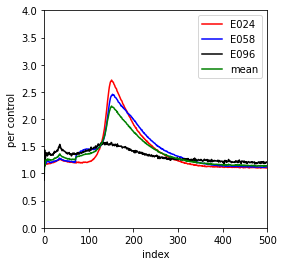

In [41]:
# 図をpdfにして保存
plt.figure(figsize=(4,4))
plt.plot(df1.iloc[:,3], label="E024", color="red")
plt.plot(df2.iloc[:,3], label="E058", color="blue")
plt.plot(df3.iloc[:,3], label="E096", color="black")
plt.plot(df1.index, averaged_array, label="mean", color="green")
plt.xlim(0,500)
plt.ylim(0,4)
plt.xlabel("index")
plt.ylabel("per control")
plt.legend(loc='upper right')
plt.savefig("rinkou3.pdf")

Q4: add figure of Jaccard index

In [62]:
# decide axis range
all_jaccard_index = []
for i in df1, df2, df3:
    add_list = list(i.iloc[:,0])
    all_jaccard_index.extend(add_list)

y0, y1 = min(all_jaccard_index)* .9, max(all_jaccard_index)*1.1

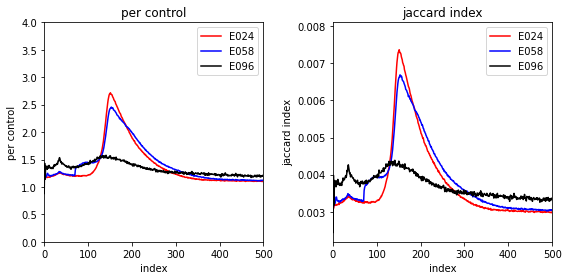

In [76]:
plt.figure(figsize=(8, 4))
# figure of per control
plt.subplot(1,2,1)
plt.plot(df1.iloc[:,3], label="E024", color="red")
plt.plot(df2.iloc[:,3], label="E058", color="blue")
plt.plot(df3.iloc[:,3], label="E096", color="black")
plt.title("per control")
plt.xlim(0,500)
plt.ylim(0,4)
plt.xlabel("index")
plt.ylabel("per control")
plt.legend(loc='upper right')

# figure of accard index
plt.subplot(1,2,2)
plt.plot(df1.iloc[:,0], label="E024", color="red")
plt.plot(df2.iloc[:,0], label="E058", color="blue")
plt.plot(df3.iloc[:,0], label="E096", color="black")
plt.title("jaccard index")
plt.xlim(0,500)
plt.ylim(y0,y1)
plt.xlabel("index")
plt.ylabel("jaccard index")
plt.legend(loc='upper right')

plt.tight_layout()
plt.savefig("rinkou_1009_sakatani.pdf")